In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [12]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [13]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [14]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [15]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [16]:
data["data"].shape

(442, 10)

In [17]:
df = pd.DataFrame(np.c_[data["data"], data["target"]], columns = np.append(data["feature_names"], ["target"]))

In [18]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 10].values

In [20]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 10)

In [22]:
model = LinearRegression()
model = model.fit(Xtrain, ytrain)

In [24]:
ypred = model.predict(Xtest)
ypred

array([148.0978202 , 208.21400551, 186.40125844,  82.48876916,
       163.39689627, 126.17904513, 126.17880476, 264.70212482,
        78.54654307,  73.56261024, 124.46582144, 142.22854705,
       166.4549438 ,  98.5009742 ,  49.71902346, 223.51963411,
       143.44310503, 110.50382605, 202.53415354,  78.49893296,
       191.80901882, 243.20695862,  75.88822445, 214.90606332,
        55.73078912, 158.0288059 , 157.54022573, 158.88728076,
       166.2184483 , 107.63124236, 276.82392637, 179.20197197,
        60.48832138, 157.42965435, 218.98333103, 182.29672873,
        70.84400009, 186.74011272, 285.13886084, 196.19611072,
       202.26256246, 145.38319546, 215.02583484, 124.55391269,
        80.17027241,  98.99544054,  82.02453761,  83.40439369,
       289.99388729, 134.33663141, 112.1313993 , 152.32625919,
       109.90441466, 226.28134724, 245.74116064,  85.56172621,
       122.28262271, 139.20254207, 198.95361934, 120.92252444,
       179.99231965, 106.43580454, 123.03066928,  96.46

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(ytest, ypred)

2911.8279516891616

In [26]:
r2_score(ytest, ypred)

0.5341962544929233

ValueError: x and y must be the same size

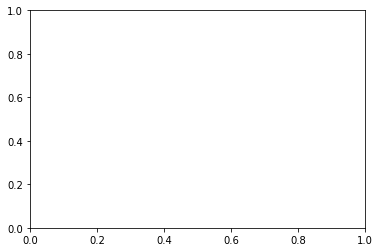

In [27]:
plt.scatter(Xtest, ytest, color = "black")
plt.plot(Xtest, ypred, color = "blue")